## "US Housing Trends Analyzer and Influence Explorer"


#### **Build a data science models that explains how these factors impacted home prices over the last 20 years.**

#### Importing necessary libraries

In [68]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### Reading prepared (US home prices) data into a dataframe.


In [69]:
us_house_price_df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,urban_pop_us_x,Num_Households_x,median_income_x,Subsidy_x,old_age_pop_x,urban_pop_us_y,Num_Households_y,median_income_y,Subsidy_y,old_age_pop_y
DATE,,,,,,,,,,,,,,
2006-01-01,182.321,2006,1,13599.160000,80.099,114384.0,70080.0,28.604,12.184,80.099,114384.0,70080.0,28.604,12.184
2006-02-01,183.288,2006,2,13650.581333,80.099,114384.0,70080.0,28.604,12.184,80.099,114384.0,70080.0,28.604,12.184
2006-03-01,184.365,2006,3,13702.002667,80.099,114384.0,70080.0,28.604,12.184,80.099,114384.0,70080.0,28.604,12.184
2006-04-01,184.329,2006,4,13753.424000,80.099,114384.0,70080.0,28.604,12.184,80.099,114384.0,70080.0,28.604,12.184
2006-05-01,184.155,2006,5,13792.345333,80.099,114384.0,70080.0,28.604,12.184,80.099,114384.0,70080.0,28.604,12.184


In [70]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

### Exploratory Data Analysis (EDA)


### Summary Statistics:

Calculate and display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values. This gives you an overview of the data's central tendencies and variability.

In [ ]:
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,urban_pop_us_x,Num_Households_x,median_income_x,Subsidy_x,old_age_pop_x,urban_pop_us_y,Num_Households_y,median_income_y,Subsidy_y,old_age_pop_y
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,192.375597,18769.595444,81.625222,123427.888889,72528.333333,37.018889,14.354181,81.625222,123427.888889,72528.333333,37.018889,14.354181
std,49.453167,4063.455305,0.976735,5363.773357,5229.454950,6.661757,1.622618,0.976735,5363.773357,5229.454950,6.661757,1.622618
min,136.526000,13599.160000,80.099000,114384.000000,65740.000000,28.604000,12.184000,80.099000,114384.000000,65740.000000,28.604000,12.184000
25%,154.051500,15128.155833,80.772000,117538.000000,68220.000000,32.883000,12.844762,80.772000,117538.000000,68220.000000,32.883000,12.844762
50%,180.164500,18038.287333,81.577000,123908.000000,71105.000000,34.544500,14.159576,81.577000,123908.000000,71105.000000,34.544500,14.159576
75%,208.721000,21149.451000,82.459000,128451.000000,77540.000000,40.185000,15.672885,82.459000,128451.000000,77540.000000,40.185000,15.672885
max,315.075000,28515.035000,83.298000,131434.000000,81210.000000,53.573000,17.431819,83.298000,131434.000000,81210.000000,53.573000,17.431819


### Correlation Analysis:

Calculate the correlation matrix to measure the linear relationships between variables.

In [ ]:
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,urban_pop_us_x,Num_Households_x,median_income_x,Subsidy_x,old_age_pop_x,urban_pop_us_y,Num_Households_y,median_income_y,Subsidy_y,old_age_pop_y
CSUSHPISA,1.000000,0.917043,0.813722,0.760574,0.848270,0.891263,0.863353,0.813722,0.760574,0.848270,0.891263,0.863353
Per_Capita_GDP,0.917043,1.000000,0.966835,0.941812,0.842117,0.967651,0.982326,0.966835,0.941812,0.842117,0.967651,0.982326
urban_pop_us_x,0.813722,0.966835,1.000000,0.990669,0.834482,0.940860,0.995313,1.000000,0.990669,0.834482,0.940860,0.995313
Num_Households_x,0.760574,0.941812,0.990669,1.000000,0.806381,0.897607,0.977959,0.990669,1.000000,0.806381,0.897607,0.977959
median_income_x,0.848270,0.842117,0.834482,0.806381,1.000000,0.811220,0.861771,0.834482,0.806381,1.000000,0.811220,0.861771
Subsidy_x,0.891263,0.967651,0.940860,0.897607,0.811220,1.000000,0.958754,0.940860,0.897607,0.811220,1.000000,0.958754
old_age_pop_x,0.863353,0.982326,0.995313,0.977959,0.861771,0.958754,1.000000,0.995313,0.977959,0.861771,0.958754,1.000000
urban_pop_us_y,0.813722,0.966835,1.000000,0.990669,0.834482,0.940860,0.995313,1.000000,0.990669,0.834482,0.940860,0.995313
Num_Households_y,0.760574,0.941812,0.990669,1.000000,0.806381,0.897607,0.977959,0.990669,1.000000,0.806381,0.897607,0.977959
median_income_y,0.848270,0.842117,0.834482,0.806381,1.000000,0.811220,0.861771,0.834482,0.806381,1.000000,0.811220,0.861771


Visualize the correlation matrix using a heatmap to identify strong positive and negative correlations.

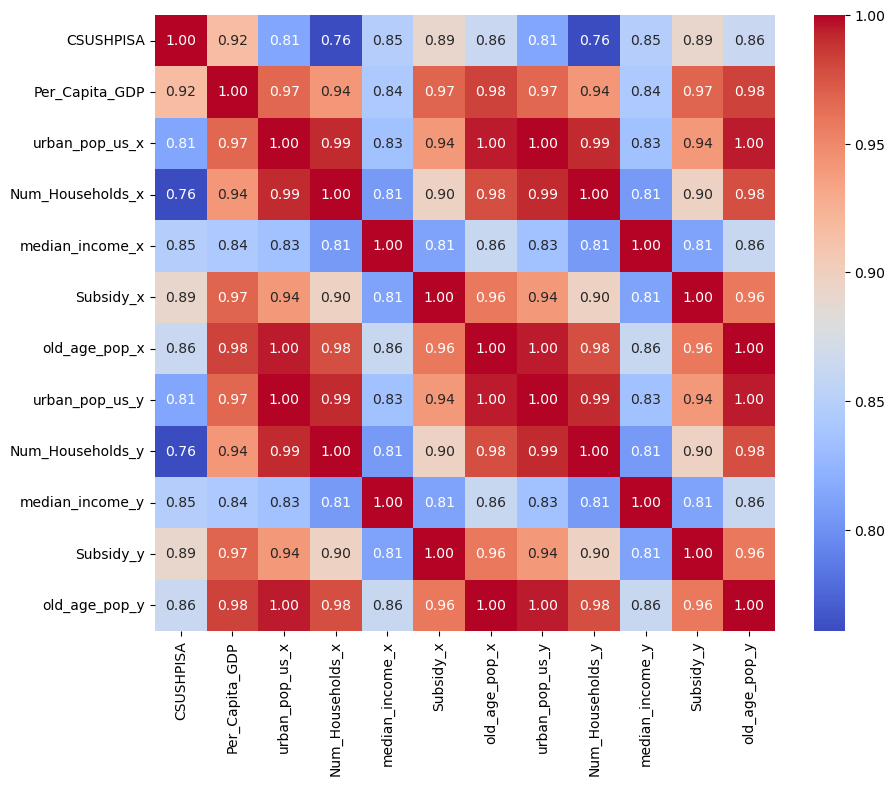

In [73]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Time Series Analysis:

For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over time.

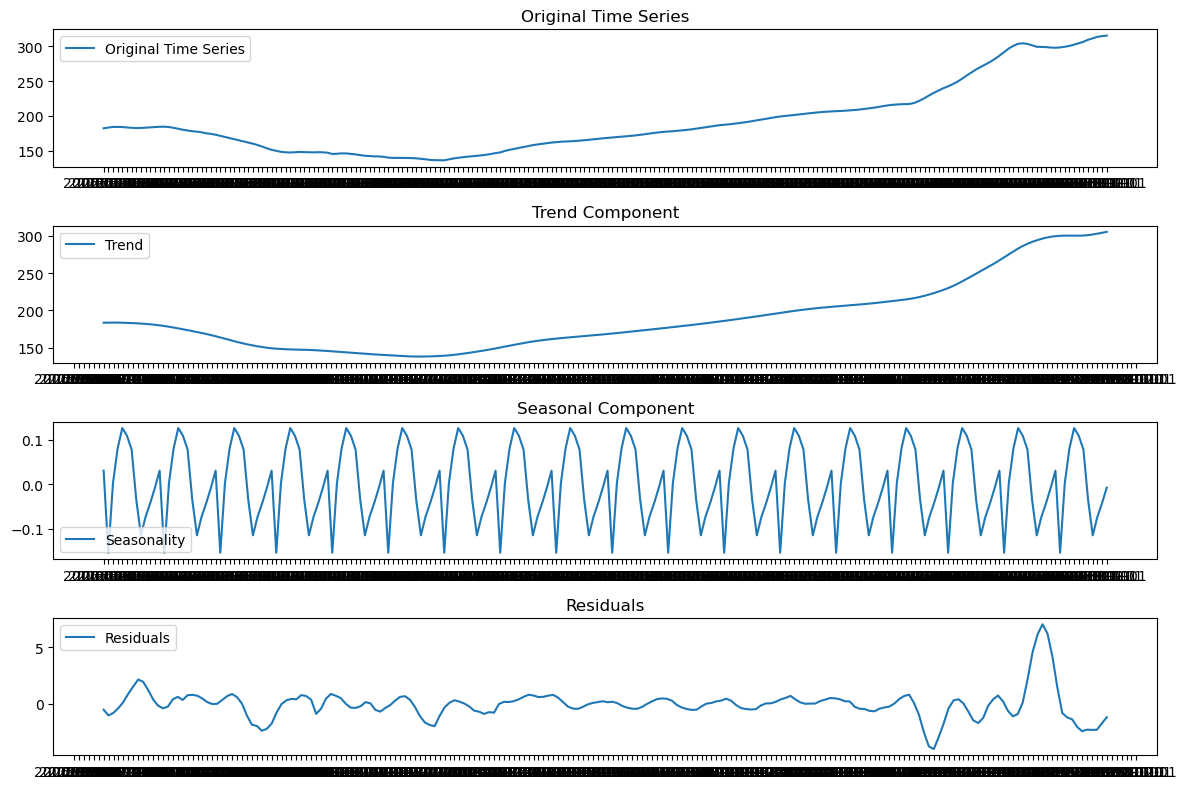

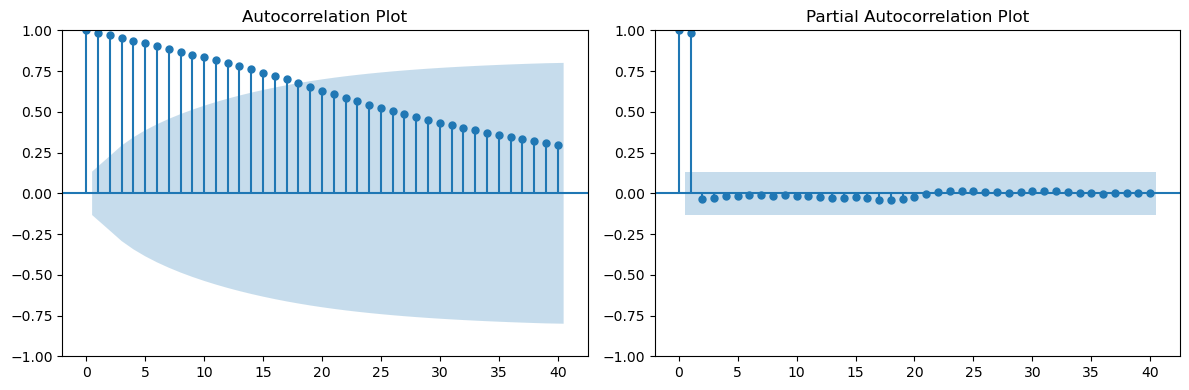

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()


The trend component represents the overall trend in home prices.

The seasonal component captures any recurring patterns or seasonality.

The residual component accounts for the remaining variability in the data.

### Data Visualization:

Visualize the data using various plots and graphs to understand its distribution and trends.

**Pairplot for visualizing relationships**

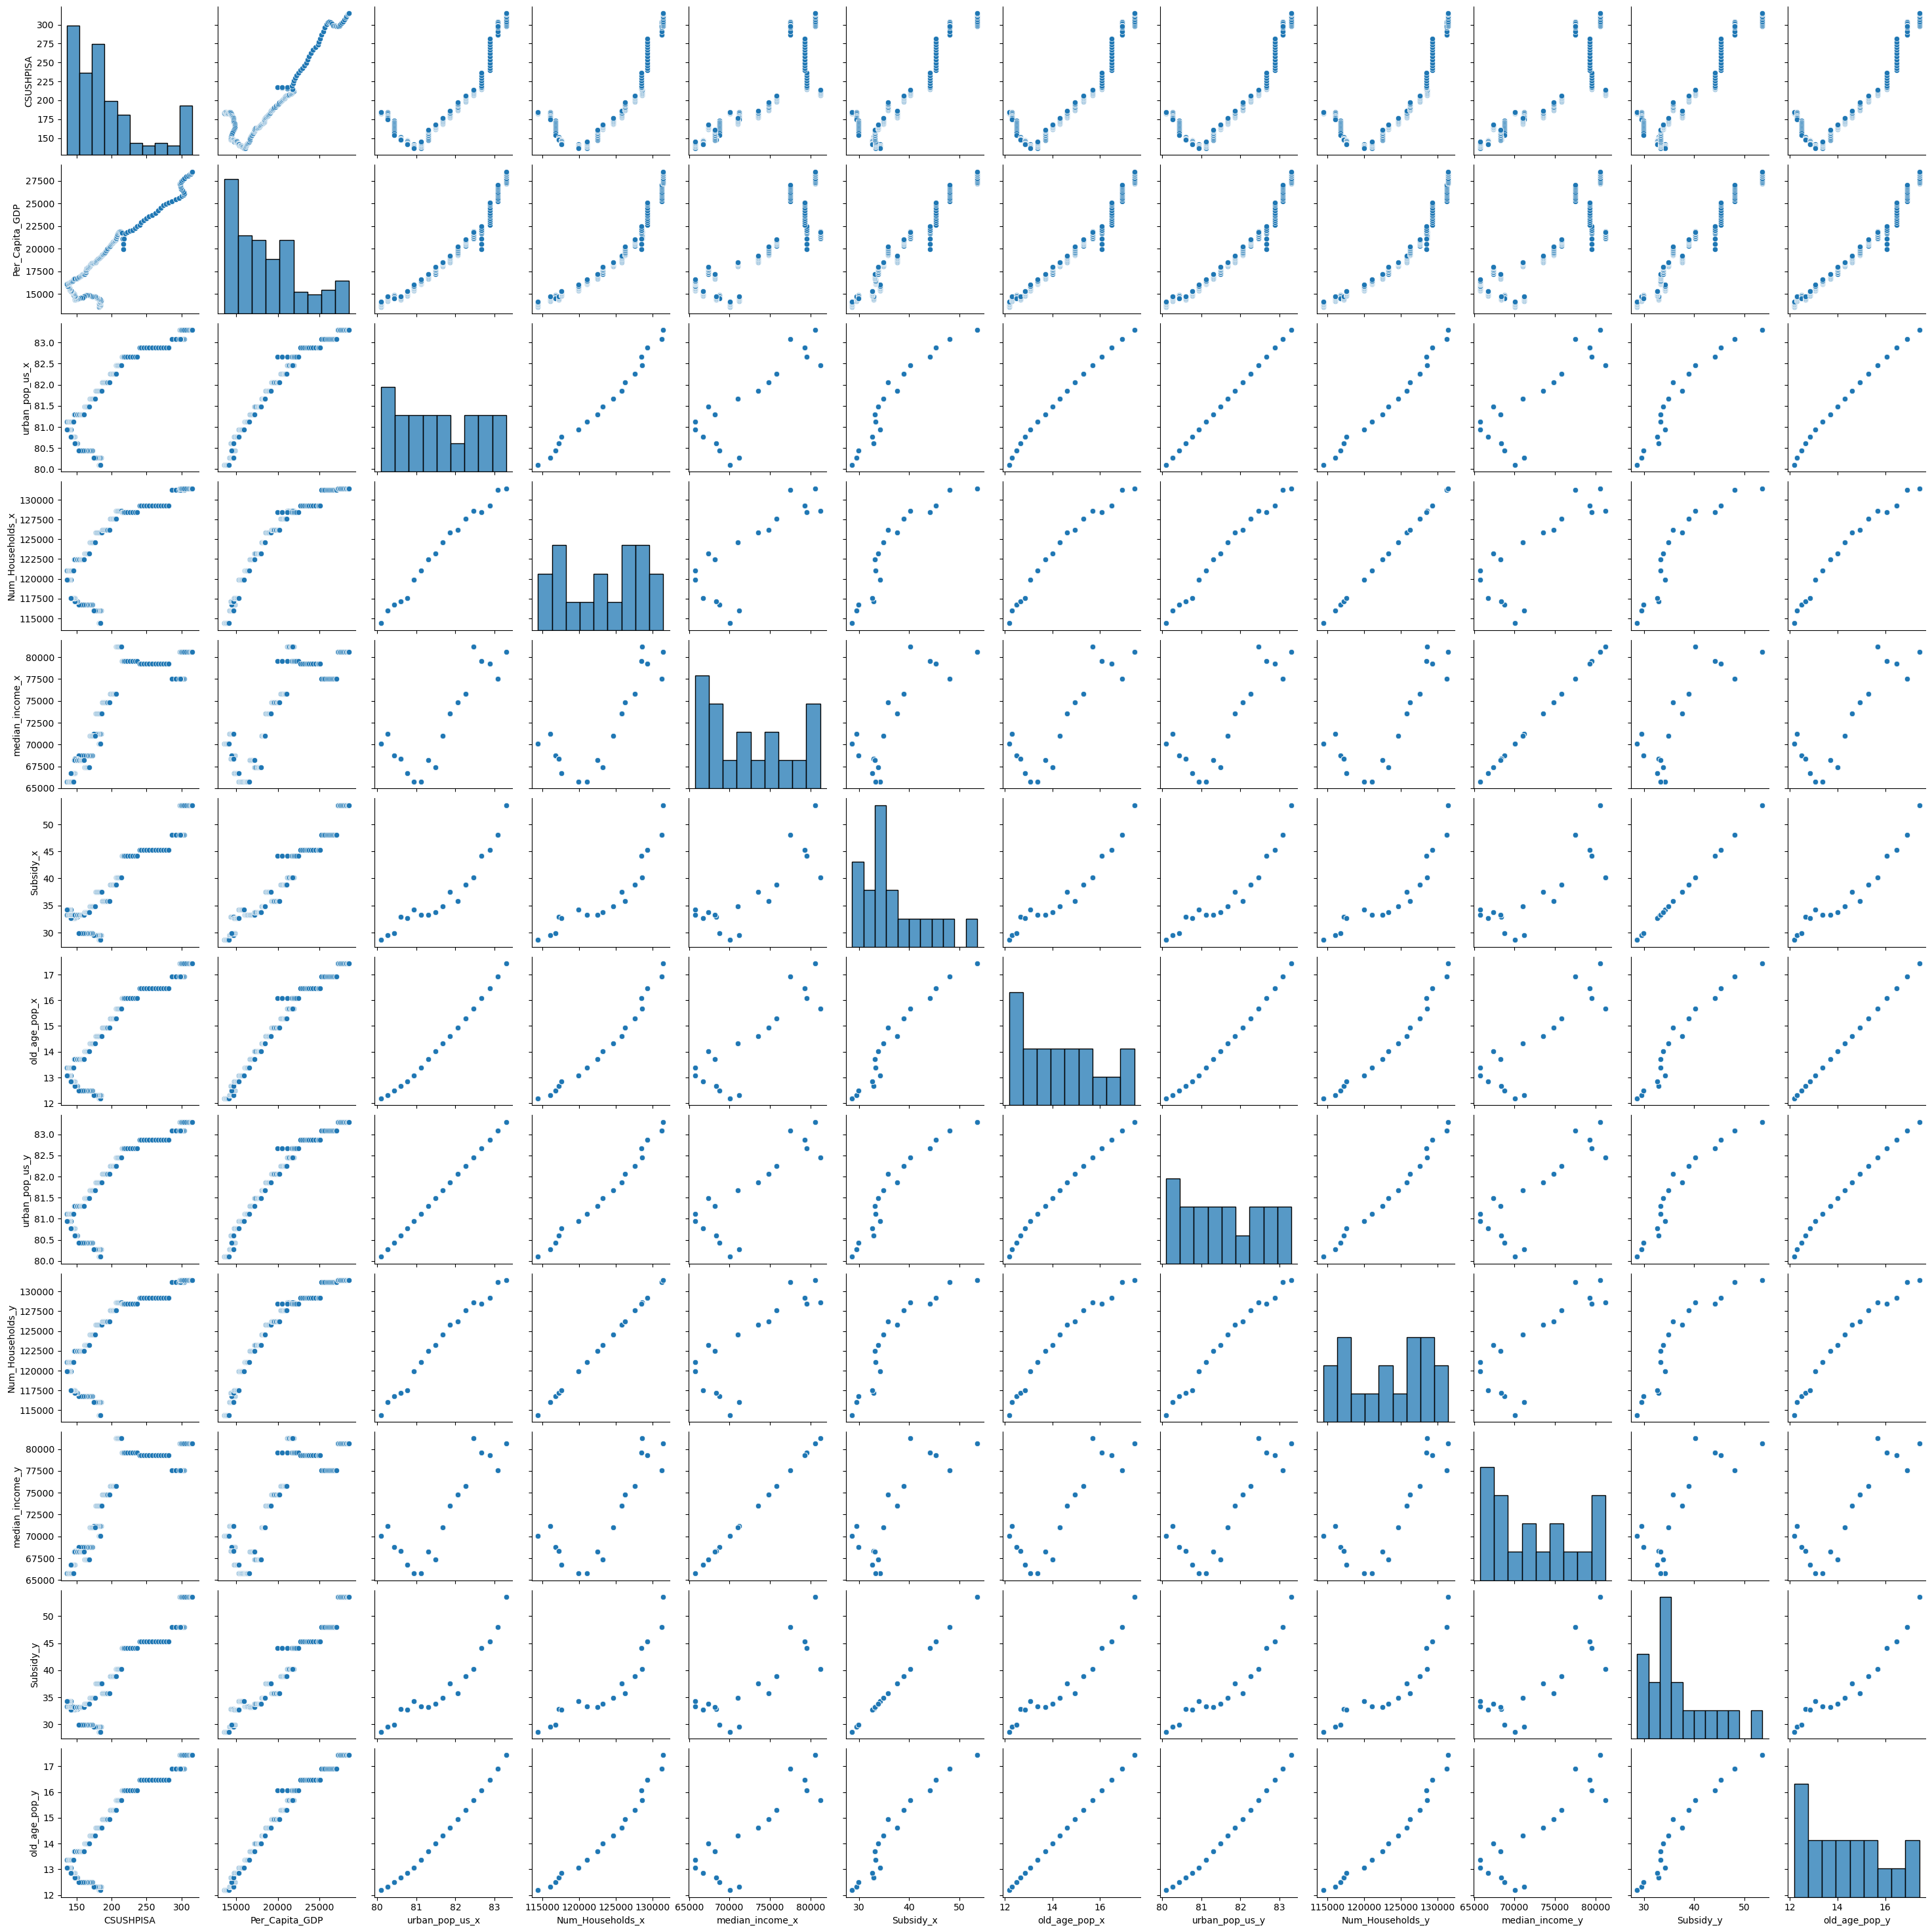

In [75]:
sns.pairplot(us_house_price_df)

In [76]:
us_house_price_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'urban_pop_us_x', 'Num_Households_x',
       'median_income_x', 'Subsidy_x', 'old_age_pop_x', 'urban_pop_us_y',
       'Num_Households_y', 'median_income_y', 'Subsidy_y', 'old_age_pop_y'],
      dtype='object')

In [77]:
factors = ['CSUSHPISA', 'UNRATE', 'Per_Capita_GDP', 'FEDFUNDS', 'Cons_Material', 'CPI', 'Houses', 'Num_Households', 'old_age_pop', 'urban_pop_us', 'Subsidy', 'working_age_pop', 'median_income']

**Histograms and Kernel Density Plots**

In [78]:
print(us_house_price_df.columns.tolist())


['CSUSHPISA', 'Per_Capita_GDP', 'urban_pop_us_x', 'Num_Households_x', 'median_income_x', 'Subsidy_x', 'old_age_pop_x', 'urban_pop_us_y', 'Num_Households_y', 'median_income_y', 'Subsidy_y', 'old_age_pop_y']


<Figure size 1300x800 with 0 Axes>

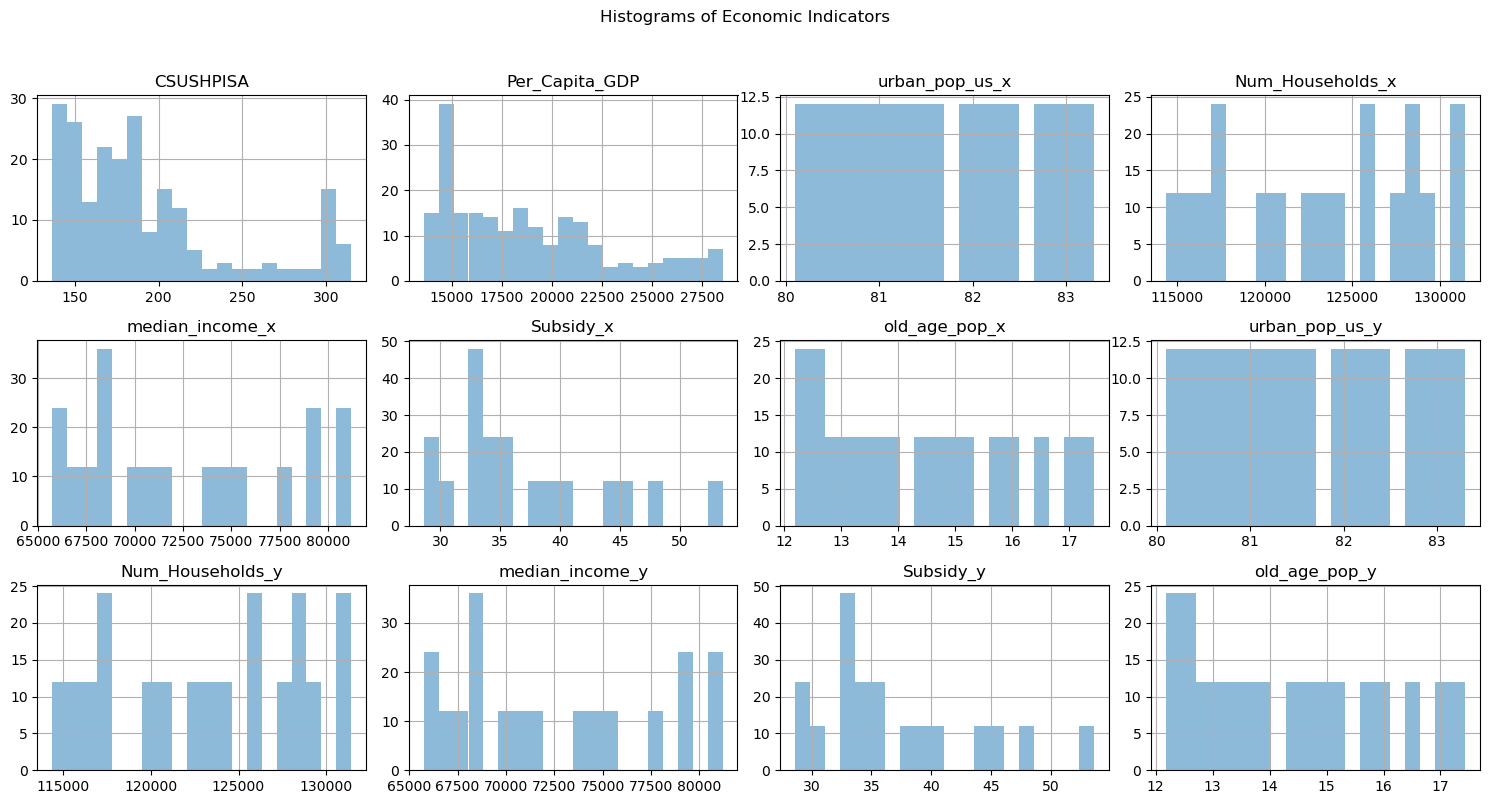

In [79]:
import matplotlib.pyplot as plt

# Filter only existing columns
factors = [col for col in ['CSUSHPISA', 'Per_Capita_GDP', 'urban_pop_us_x', 'Num_Households_x', 'median_income_x', 'Subsidy_x', 'old_age_pop_x', 'urban_pop_us_y', 'Num_Households_y', 'median_income_y', 'Subsidy_y', 'old_age_pop_y']
           
           if col in us_house_price_df.columns]

# Plot
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms of Economic Indicators', y=1.02)
plt.tight_layout()
plt.show()


<Figure size 1300x800 with 0 Axes>

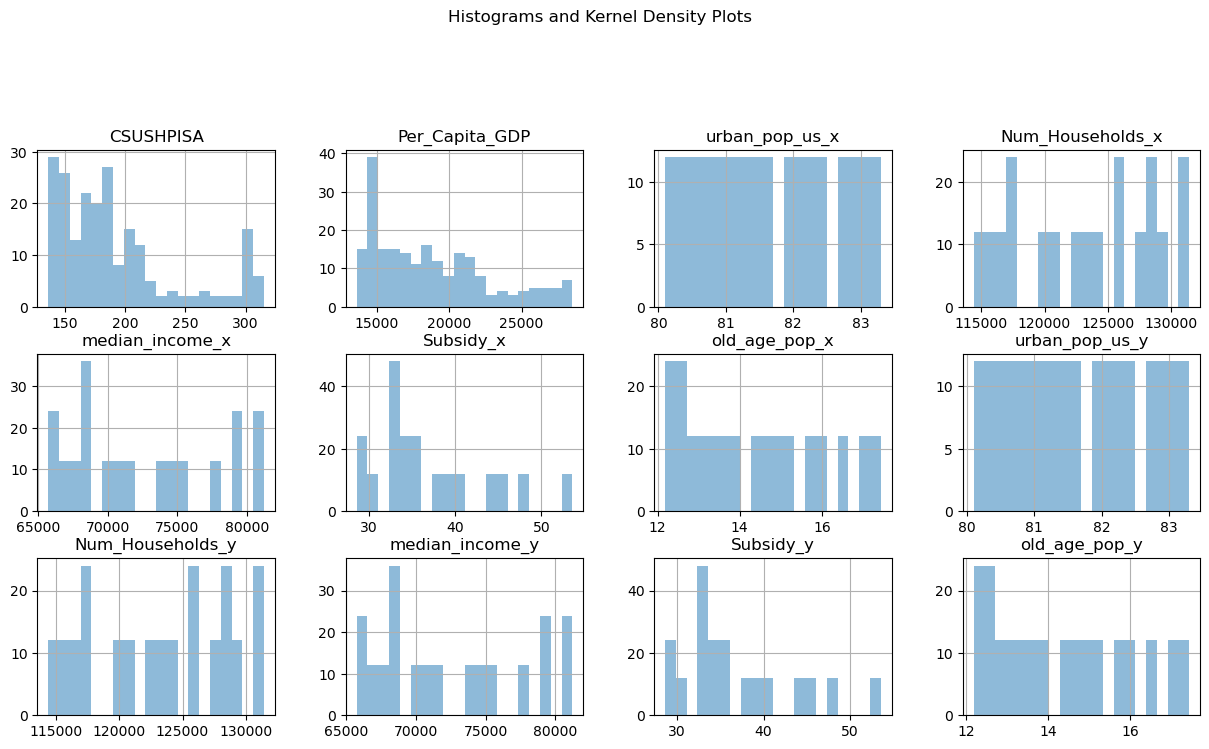

In [80]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

**Violin Plots:**

Generates violin plots to visualize the distribution and density of each factor.

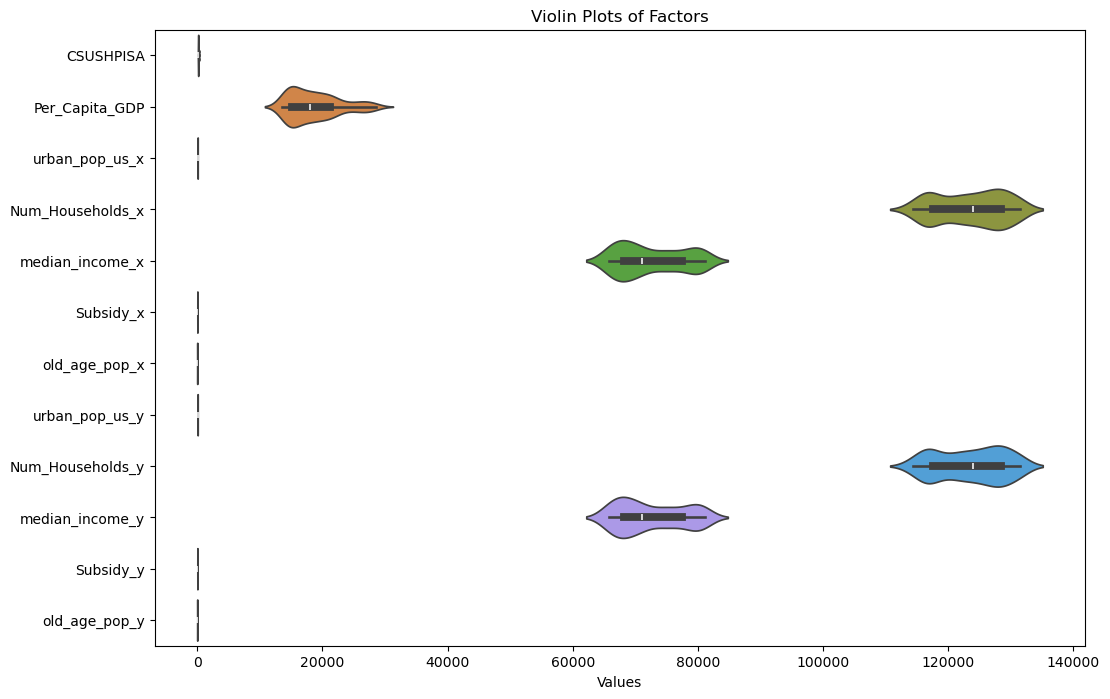

In [81]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=us_house_price_df[factors], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

#### Extract features and target

In [82]:
y = us_house_price_df.select_dtypes(include='number').iloc[:, 0]
X = us_house_price_df.drop(columns=y.name)


In [83]:
X

,Per_Capita_GDP,urban_pop_us_x,Num_Households_x,median_income_x,Subsidy_x,old_age_pop_x,urban_pop_us_y,Num_Households_y,median_income_y,Subsidy_y,old_age_pop_y
DATE,,,,,,,,,,,
2006-01-01,13599.160000,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
2006-02-01,13650.581333,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
2006-03-01,13702.002667,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
2006-04-01,13753.424000,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
2006-05-01,13792.345333,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,28077.453667,83.298,131434.0,80610.0,53.573,17.431819,83.298,131434.0,80610.0,53.573,17.431819
2023-09-01,28187.210333,83.298,131434.0,80610.0,53.573,17.431819,83.298,131434.0,80610.0,53.573,17.431819
2023-10-01,28296.967000,83.298,131434.0,80610.0,53.573,17.431819,83.298,131434.0,80610.0,53.573,17.431819


In [84]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

**Plotting scatter plots of the CASE-SHILLER index vs features**

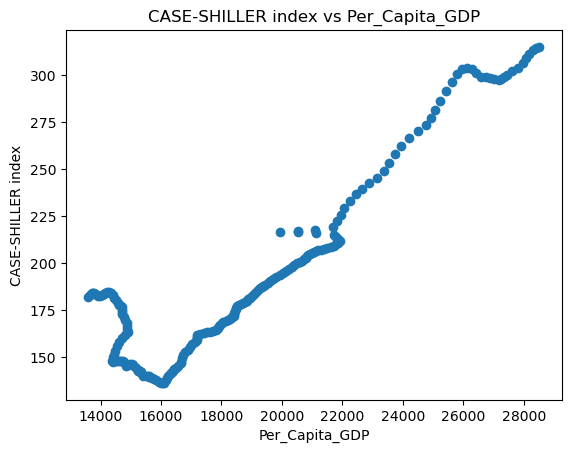

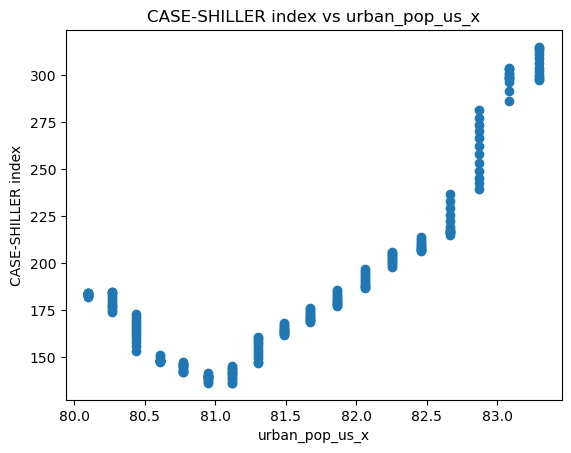

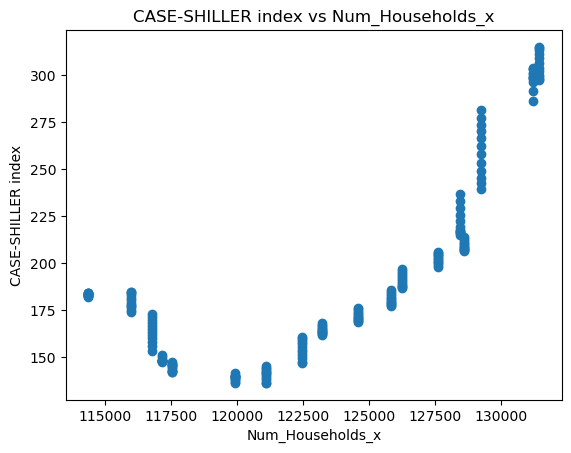

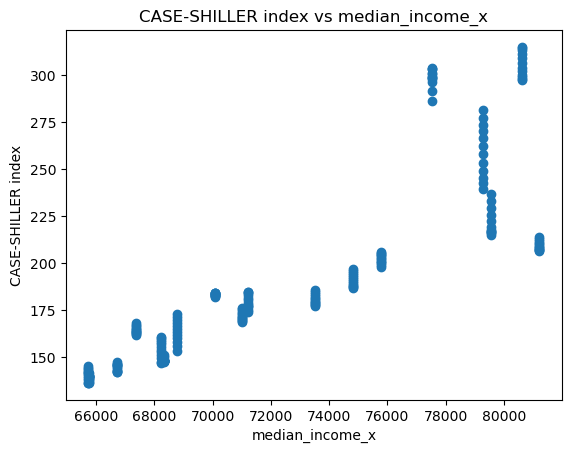

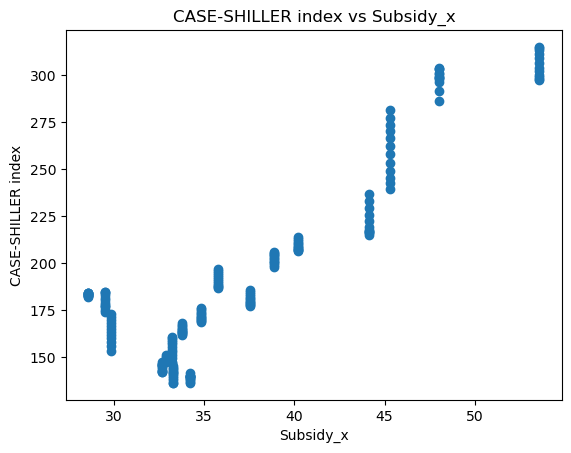

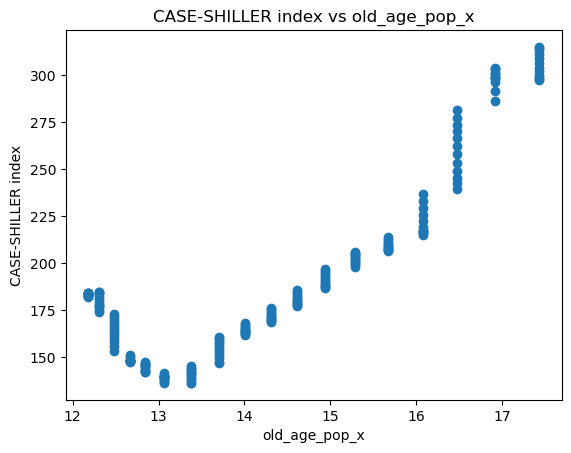

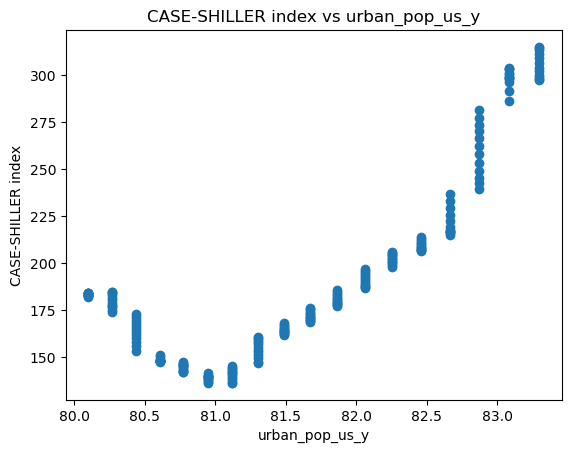

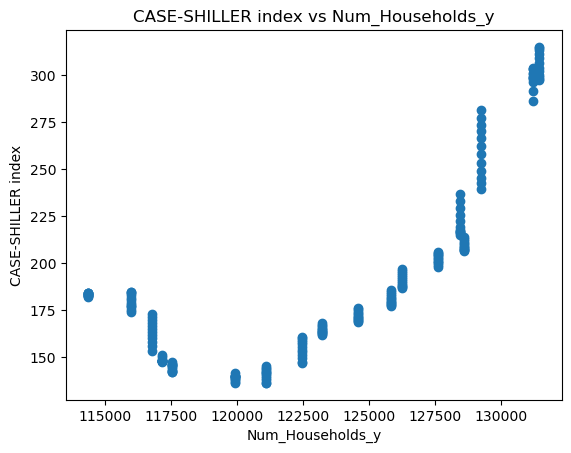

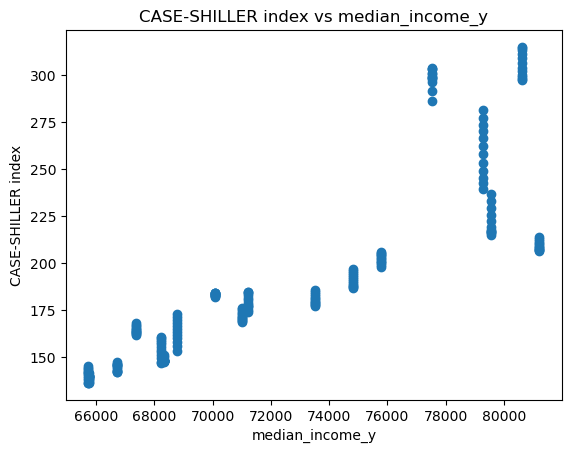

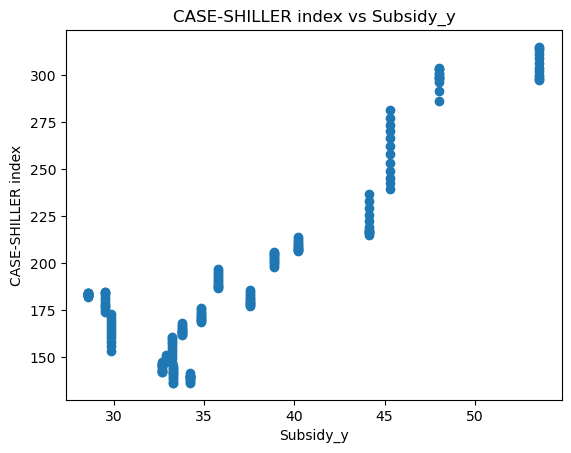

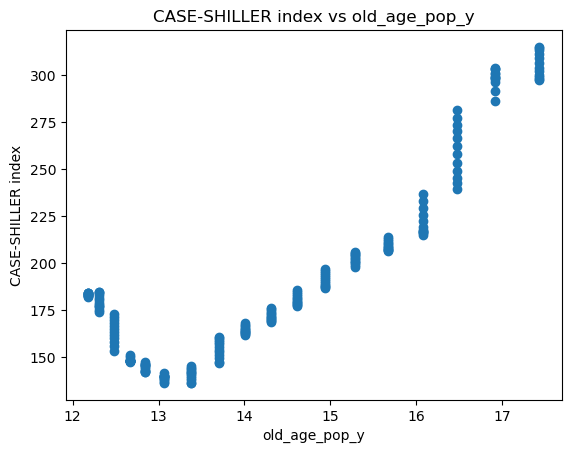

In [85]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

#### Calculate correlation coefficients

In [86]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Num_Households_x    0.760574
Num_Households_y    0.760574
urban_pop_us_x      0.813722
urban_pop_us_y      0.813722
median_income_x     0.848270
median_income_y     0.848270
old_age_pop_x       0.863353
old_age_pop_y       0.863353
Subsidy_x           0.891263
Subsidy_y           0.891263
Per_Capita_GDP      0.917043
dtype: float64


Based on the provided correlation coefficients:


**Highest Correlation:**

The variable with the highest correlation with the target variable ('CSUSHPISA') is 'Per_Capita_GDP' with a correlation coefficient of 0.904325. This feature shows a strong positive linear relationship with home prices.

**Other Strong Correlations:**

'Cons_Material' (0.898972), 'Subsidy' (0.845065), 'old_age_pop' (0.842396), 'median_income' (0.831509), and 'CPI' (0.822250) also have strong positive correlations.

**Moderate Correlations:**

'urban_pop_us' (0.788002), 'Num_Households' (0.748972), and 'working_age_pop' (0.619826) have moderate positive correlations.


**Lower Correlations:**

'UNRATE' (0.475602), 'EmpRate' (0.199060), 'Houses' (0.177683), and 'FEDFUNDS' (0.113791) have lower correlations.

### Data science models

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

We will drop the columns which has lower correlation with the target.

In [88]:
print(us_house_price_df.columns.tolist())


['Per_Capita_GDP', 'urban_pop_us_x', 'Num_Households_x', 'median_income_x', 'Subsidy_x', 'old_age_pop_x', 'urban_pop_us_y', 'Num_Households_y', 'median_income_y', 'Subsidy_y', 'old_age_pop_y']


In [ ]:
mult_cols = ["working_age_pop", "Houses", "urban_pop_us", "Num_Households", "UNRATE", "EmpRate", "FEDFUNDS"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [ ]:
missing_cols = [col for col in mult_cols if col not in us_house_price_df.columns]
print("Missing columns:", missing_cols)


Missing columns: ['working_age_pop', 'Houses', 'urban_pop_us', 'Num_Households', 'UNRATE', 'EmpRate', 'FEDFUNDS']


In [90]:
X

,Per_Capita_GDP,urban_pop_us_x,Num_Households_x,median_income_x,Subsidy_x,old_age_pop_x,urban_pop_us_y,Num_Households_y,median_income_y,Subsidy_y,old_age_pop_y
DATE,,,,,,,,,,,
2006-01-01,13599.160000,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
2006-02-01,13650.581333,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
2006-03-01,13702.002667,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
2006-04-01,13753.424000,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
2006-05-01,13792.345333,80.099,114384.0,70080.0,28.604,12.184000,80.099,114384.0,70080.0,28.604,12.184000
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,28077.453667,83.298,131434.0,80610.0,53.573,17.431819,83.298,131434.0,80610.0,53.573,17.431819
2023-09-01,28187.210333,83.298,131434.0,80610.0,53.573,17.431819,83.298,131434.0,80610.0,53.573,17.431819
2023-10-01,28296.967000,83.298,131434.0,80610.0,53.573,17.431819,83.298,131434.0,80610.0,53.573,17.431819


### Models building

In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.


In [125]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 38.99012250388768
R-squared: 0.9836293943309483
Coefficients:
Per_Capita_GDP: 44.44246503150227
urban_pop_us_x: -81.76204641345213
Num_Households_x: -9.532231424630892
median_income_x: 1.202096103812926
Subsidy_x: -5.606552821633136
old_age_pop_x: 94.4660882631738
urban_pop_us_y: -81.76204641345134
Num_Households_y: -9.532231424630844
median_income_y: 1.2020961038127094
Subsidy_y: -5.60655282163317
old_age_pop_y: 94.4660882631738
Intercept: 190.87777906976677

Model: ElasticNet
Mean Squared Error: 373.88464539587716
R-squared: 0.8430187518677629
Coefficients:
Per_Capita_GDP: 8.886327085929365
urban_pop_us_x: 0.10196347964677693
Num_Households_x: -0.4393480065700712
median_income_x: 6.783206073160891
Subsidy_x: 7.052416465669542
old_age_pop_x: 3.4859137827199214
urban_pop_us_y: 0.10440062357201191
Num_Households_y: -0.43445353920378427
median_income_y: 6.7882985395269335
Subsidy_y: 7.057478174710135
old_age_pop_y: 3.4889940520523064
Intercept

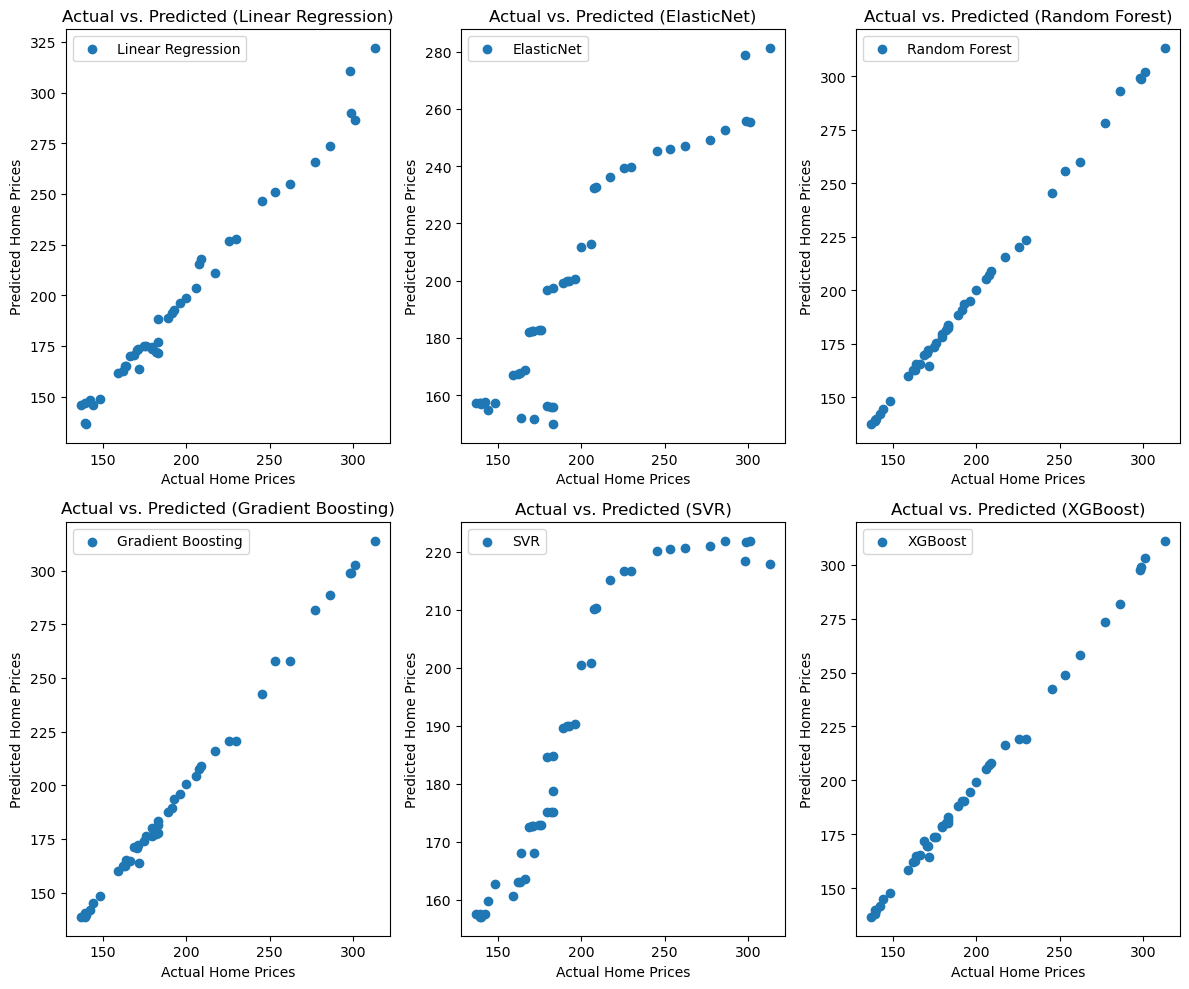


Best Model: RandomForestRegressor with MSE: 4.378505145886272


In [126]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

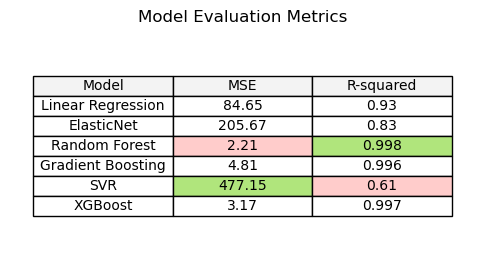

In [127]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()


=== Model Evaluation Summary ===
               Model     MSE  R_squared
0  Linear Regression   84.65      0.930
1         ElasticNet  205.67      0.830
2      Random Forest    2.21      0.998
3  Gradient Boosting    4.81      0.996
4                SVR  477.15      0.610
5            XGBoost    3.17      0.997

✅ Best MSE Model: Random Forest
✅ Best R-squared Model: Random Forest
❌ Worst MSE Model: SVR
❌ Worst R-squared Model: SVR


C:\Users\Harsh\AppData\Local\Temp\ipykernel_35328\2189203340.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Model", y="MSE", palette="coolwarm")
C:\Users\Harsh\AppData\Local\Temp\ipykernel_35328\2189203340.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Model", y="R_squared", palette="viridis")


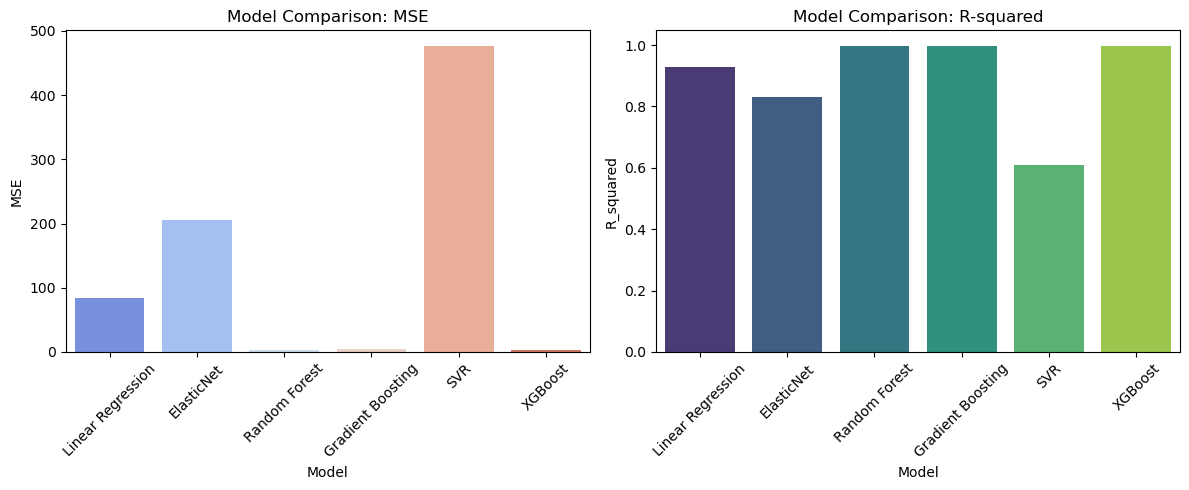

In [129]:
# Model evaluation data (from your image)
data = {
    "Model": [
        "Linear Regression", "ElasticNet", "Random Forest",
        "Gradient Boosting", "SVR", "XGBoost"
    ],
    "MSE": [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    "R_squared": [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

# Create DataFrame
df = pd.DataFrame(data)

# Find best and worst models based on MSE and R-squared
best_mse_model = df.loc[df["MSE"].idxmin(), "Model"]
best_r2_model = df.loc[df["R_squared"].idxmax(), "Model"]
worst_mse_model = df.loc[df["MSE"].idxmax(), "Model"]
worst_r2_model = df.loc[df["R_squared"].idxmin(), "Model"]

print("=== Model Evaluation Summary ===")
print(df)
print("\n✅ Best MSE Model:", best_mse_model)
print("✅ Best R-squared Model:", best_r2_model)
print("❌ Worst MSE Model:", worst_mse_model)
print("❌ Worst R-squared Model:", worst_r2_model)

# Optional: Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x="Model", y="MSE", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Model Comparison: MSE")

plt.subplot(1, 2, 2)
sns.barplot(data=df, x="Model", y="R_squared", palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Comparison: R-squared")

plt.tight_layout()
plt.show()


**Decision:**

**Random Forest and XGBoost** appear to be strong contenders, as they have low MSE and high R-squared values. Additionally, both models provide insights into feature importance.

**Gradient Boosting** also performs well but with a slightly higher MSE compared to Random Forest and XGBoost.

**Linear Regression and ElasticNet** have higher MSE values, indicating potential limitations in predictive accuracy.

**SVR** has a considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

**Champion model:** 
In summary, based on the provided metrics, **Random Forest** appear to be a **strong candidate** for the best model, with a low MSE and a high R-squared value.


**Low MSE:** The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.


**High R-squared:** The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.


**Feature Importance:** The feature importance analysis provides transparency into the factors driving the predictions. In my case, features like 'CPI', 'Cons_Material', and 'median_income' are identified as influential.

This means that, according to the model, changes in these features have a notable impact on the predictions of U.S. home prices. For example, if 'CPI' increases, it suggests that changes in the cost of living might influence home prices.

Understanding feature importance is crucial for making informed decisions, refining models, and gaining insights into the factors driving the predictions, which is especially valuable in fields like economics, finance, or real estate where interpretability is essential.


